# 12_pandas

In [87]:
import pandas as pd
import numpy as np

### 데이터 합치기 예제
- lval: 가격
- rval: 수강정원

In [88]:
left = pd.DataFrame({'good':['oneday', 'oneday'], 'lval':[20000, 25000]})
left

,good,lval
0,oneday,20000
1,oneday,25000


In [89]:
right = pd.DataFrame({'good':['oneday', 'oneday'], 'lval':[4, 5]})
right

,good,lval
0,oneday,4
1,oneday,5


In [90]:
# 이 경우에는 카타시안 곱이 발생
pd.merge(left, right, on = 'good')

,good,lval_x,lval_y
0,oneday,20000,4
1,oneday,20000,5
2,oneday,25000,4
3,oneday,25000,5


In [91]:
# left와 right의 1번 행의 good을 bigdata로 변경하기
left.loc[1, 'good'] = 'bigdata'
right.loc[1, 'good'] = 'bigdata'

In [92]:
left

,good,lval
0,oneday,20000
1,bigdata,25000


In [93]:
right

,good,lval
0,oneday,4
1,bigdata,5


In [94]:
pd.merge(left, right, on = 'good')

,good,lval_x,lval_y
0,oneday,20000,4
1,bigdata,25000,5


### Grouping

In [95]:
df2 = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/pandas/my_data_02.csv')
df2

,A,B,C,D
0,foo,one,-0.272853,0.445702
1,bar,one,-0.942053,-1.546124
2,foo,two,1.163523,1.230163
3,bar,three,-0.428761,0.325022
4,foo,two,1.188806,2.189103
5,bar,two,-1.320671,-1.510452
6,foo,one,-1.729539,1.112231
7,foo,three,1.403014,0.256193


In [96]:
# 총합 구하기
df2.sum()

A        foobarfoobarfoobarfoofoo
B    oneonetwothreetwotwoonethree
C                       -0.938533
D                        2.501837
dtype: object

In [97]:
# A열을 그룹화하여 총합 구하기
df2.groupby('A').sum()

,C,D
A,,
bar,-2.691485,-2.731554
foo,1.752951,5.233392


In [98]:
# B열을 그룹화하여 총합 구하기
df2.groupby('B').sum()

,C,D
B,,
one,-2.944445,0.011809
three,0.974253,0.581215
two,1.031658,1.908814


In [99]:
# 실습하기. df2의 대그룹(A열)의 중그룹(B열)의 총합을 구해주세요
df2.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.942053 -1.546124
    three -0.428761  0.325022
    two   -1.320671 -1.510452
foo one   -2.002392  1.557933
    three  1.403014  0.256193
    two    2.352329  3.419265

### 시계열 데이터 

In [100]:
# 첫 실행 시에 바로 시각화 하겠다.
%matplotlib inline

In [101]:
# 데이터 1000개를 2000년 1월 1일부터 날짜부터 생성
random_n = np.random.randn(1000)
date_n = pd.date_range('1/1/2000', periods = 1000)

ts = pd.Series(random_n, index=date_n)

In [102]:
# 누산합계
# cumsum: 각 성분에 대해서 0, 1, 2, 3, 4,가 존재한다면
# 0, 0+1, 0+1+2으로 각 성분을 더해가는 연산

<AxesSubplot:>

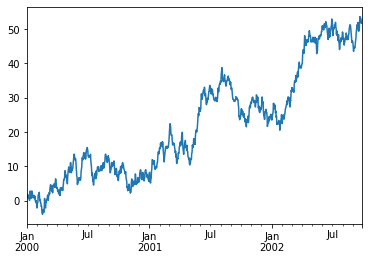

In [103]:
ts.cumsum().plot()

In [104]:
# 주식 데이터 시각화하기
# - samsung

In [107]:
# samsung의 주식 데이터 로드하기
samsung = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/pandas/samsung.csv')
samsung

,basic_date,close_value
0,01/04/2000,203500
1,01/05/2000,175000
2,01/06/2000,176000
3,01/07/2000,172500
4,01/10/2000,178000
...,...,...
4066,12/23/2016,1396000
4067,12/26/2016,1409000
4068,12/27/2016,1428000
4069,12/28/2016,1424000


In [112]:
# 인덱스 지정하기
# - 인덱스를 basic_date로 변경하기
samsung.index = samsung.basic_date

In [113]:
samsung.head()

,basic_date,close_value
basic_date,,
01/04/2000,01/04/2000,203500
01/05/2000,01/05/2000,175000
01/06/2000,01/06/2000,176000
01/07/2000,01/07/2000,172500
01/10/2000,01/10/2000,178000


In [115]:
# basic_date 열 삭제하기
samsung.drop(['basic_date'], axis=1)

,close_value
basic_date,
01/04/2000,203500
01/05/2000,175000
01/06/2000,176000
01/07/2000,172500
01/10/2000,178000
...,...
12/23/2016,1396000
12/26/2016,1409000
12/27/2016,1428000


<AxesSubplot:xlabel='basic_date'>

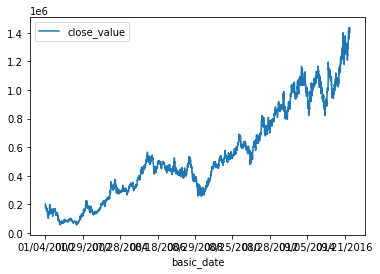

In [114]:
# 시각화하기
samsung.plot()